In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string

In [2]:
data_source_url = 'https://raw.githubusercontent.com/satyajeetkrjha/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv'
df = pd.read_csv(data_source_url)
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

<Axes: ylabel='count'>

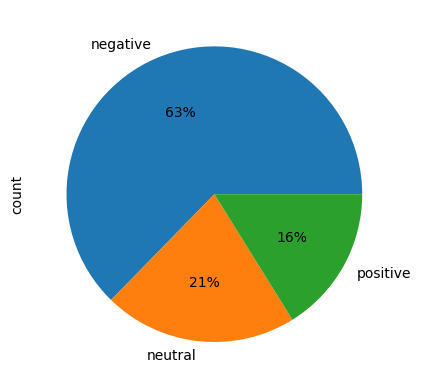

In [3]:
df['airline_sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

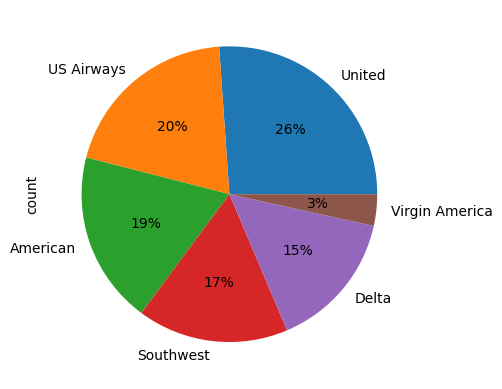

In [4]:
df['airline'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: xlabel='airline'>

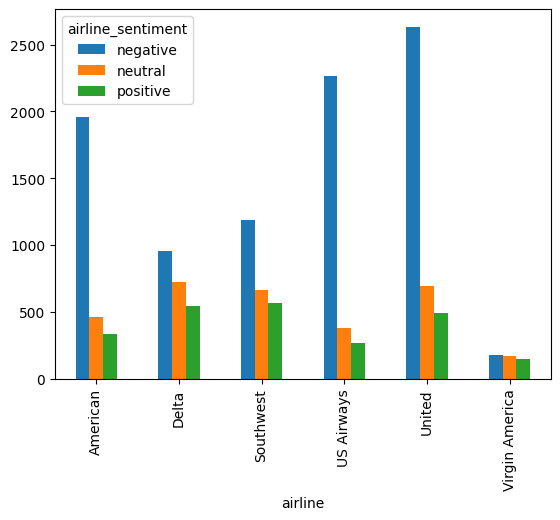

In [5]:
airline_sentiment_count = df.groupby('airline')['airline_sentiment'].value_counts().unstack()
airline_sentiment_count.plot(kind='bar')

In [6]:
label = df.values[:,1]
feature = df.values[:,10]
feature[0]

'@VirginAmerica What @dhepburn said.'

In [7]:
# 資料清洗、標點符號、狸語等等等
processed_feature = []
for setence in range(0, len(feature)):
    # 刪除所有特殊字元
    processed_feature.append(re.sub(r'\W', ' ', str(feature[setence])))
    # 刪除所有單一字元
    processed_feature[setence] = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature[setence])
    # 開頭刪除單一字元
    processed_feature[setence] = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature[setence])
    # 用單一空格取代多個空格
    processed_feature[setence] = re.sub(r'\s+', ' ', processed_feature[setence], flags=re.I)
    # 刪除前後空格
    processed_feature[setence] = re.sub(r'^\s+|\s+?$', '', processed_feature[setence])
    # 轉換小寫
    processed_feature[setence] = processed_feature[setence].lower()
    processed_feature[setence] = processed_feature[setence].translate(str.maketrans('', '', string.punctuation))

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = open('stop_words.txt').read().splitlines()

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stop_words)

tfidfconverter = vectorizer.fit_transform(processed_feature).toarray()

c:\Users\bruce_2nbsnuo\GitHub\poyu39\FCU-AI_NLP\venv-3_11_5\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['am', 'an', 'and', 'are', 'as', 'at', 'be', 'because', 'been', 'being', 'but', 'by', 'did', 'do', 'does', 'doing', 'for', 'had', 'has', 'have', 'having', 'he', 'her', 'hers', 'herself', 'him', 'himself', 'his', 'if', 'is', 'it', 'its', 'itself', 'me', 'my', 'myself', 'of', 'or', 'our', 'ours', 'ourselves', 'she', 'stop_words', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'these', 'they', 'this', 'those', 'until', 'was', 'we', 'were', 'what', 'which', 'while', 'who', 'whom', 'you', 'your', 'yours', 'yourself', 'yourselves'] not in stop_words.
  warnings.warn(


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidfconverter, label, test_size=0.2, random_state=0)

DT_text_classifier = DecisionTreeClassifier()
DT_text_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
DT_predictions = DT_text_classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, DT_predictions))
print(accuracy_score(y_test, DT_predictions))
print(classification_report(y_test, DT_predictions))

[[1439  292  139]
 [ 250  305   59]
 [ 113   94  237]]
0.6765710382513661
              precision    recall  f1-score   support

    negative       0.80      0.77      0.78      1870
     neutral       0.44      0.50      0.47       614
    positive       0.54      0.53      0.54       444

    accuracy                           0.68      2928
   macro avg       0.59      0.60      0.60      2928
weighted avg       0.69      0.68      0.68      2928



In [19]:
DT_predictions_train = DT_text_classifier.predict(X_train)
print(confusion_matrix(y_train, DT_predictions_train))
print(accuracy_score(y_train, DT_predictions_train))
print(classification_report(y_train, DT_predictions_train))

[[7301    7    0]
 [   6 2463   16]
 [   5   15 1899]]
0.995816256830601
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7308
     neutral       0.99      0.99      0.99      2485
    positive       0.99      0.99      0.99      1919

    accuracy                           1.00     11712
   macro avg       0.99      0.99      0.99     11712
weighted avg       1.00      1.00      1.00     11712



In [24]:
# random forest
from sklearn.ensemble import RandomForestClassifier

RF_text_classifier = RandomForestClassifier(n_estimators=300, random_state=0)
RF_text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [25]:
RF_text_classifier_predictions = RF_text_classifier.predict(X_test)
print(confusion_matrix(y_test, RF_text_classifier_predictions))
print(accuracy_score(y_test, RF_text_classifier_predictions))
print(classification_report(y_test, RF_text_classifier_predictions))

[[1771   79   20]
 [ 333  253   28]
 [ 178   64  202]]
0.7602459016393442
              precision    recall  f1-score   support

    negative       0.78      0.95      0.85      1870
     neutral       0.64      0.41      0.50       614
    positive       0.81      0.45      0.58       444

    accuracy                           0.76      2928
   macro avg       0.74      0.60      0.65      2928
weighted avg       0.75      0.76      0.74      2928

